In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import folium
import requests
import re
import seaborn as sns
from folium.plugins import HeatMap



Importacion de datos de JSON y generacion de Data frame

In [106]:
url="https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

#obtener datos de url
response = requests.get(url)
# Verificar que la solicitud fue exitosa
if response.status_code == 200: #200 por que corresponde a los errores de HTML
    # Convertir el JSON a un objeto de Python
    data = response.json()
    #Convertir en data frame
    df=pd.json_normalize(data, sep='.',)
    print(df.head())  # Esto será una lista o diccionario según el JSON
else:
    print("Error al obtener el archivo:", response.status_code)

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

Renombramiento de columnas

In [107]:
df.rename(columns={
    "customer.gender": "gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "Partner",
    "customer.Dependents": "Dependents",
    "customer.tenure": "tenure",
    "phone.PhoneService": "PhoneService",
    "phone.MultipleLines": "MultipleLines",
    "internet.InternetService": "InternetService",
    "internet.OnlineSecurity": "OnlineSecurity",
    "internet.OnlineBackup": "OnlineBackup",
    "internet.DeviceProtection": "DeviceProtection",
    "internet.TechSupport": "TechSupport",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingMovies",
    "account.Contract": "Contract",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod",
    "account.Charges.Monthly": "Charges.Monthly",
    "account.Charges.Total": "Charges.Total"
}, inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Comprobacion de datos

In [109]:
df.describe() #Datos estadisticos 

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [110]:
df.isnull().sum() #comprobacion de nullos
print(df.isnull().values.any())

False


In [111]:
# Resumen de valores nulos por columna
nulos = df.isnull().sum()
porcentaje = (df.isnull().sum() / len(df)) * 100

# Unir en un solo DataFrame ordenado
resumen_nulos = pd.DataFrame({
    'Nulos': nulos,
    'Porcentaje': porcentaje
}).sort_values(by='Nulos', ascending=False)

print(resumen_nulos)

                  Nulos  Porcentaje
customerID            0         0.0
OnlineBackup          0         0.0
Charges.Monthly       0         0.0
PaymentMethod         0         0.0
PaperlessBilling      0         0.0
Contract              0         0.0
StreamingMovies       0         0.0
StreamingTV           0         0.0
TechSupport           0         0.0
DeviceProtection      0         0.0
OnlineSecurity        0         0.0
Churn                 0         0.0
InternetService       0         0.0
MultipleLines         0         0.0
PhoneService          0         0.0
tenure                0         0.0
Dependents            0         0.0
Partner               0         0.0
SeniorCitizen         0         0.0
gender                0         0.0
Charges.Total         0         0.0


In [112]:
#ver cuantos valores estan duplicados
conteo = df['customerID'].value_counts()
print(conteo[conteo > 1])  

Series([], Name: count, dtype: int64)


In [113]:
valores_duplicados = df['customerID'][df['customerID'].duplicated()].unique()
print(valores_duplicados)

[]


In [114]:
# Crear una función para detectar espacios vacíos o celdas vacías
def espacios_vacios(df):
    # Aplicar strip y comparar con vacío, manejar nulos con fillna('')
    mask = df.applymap(lambda x: isinstance(x, str) and x.strip() == '')
    return mask

# Aplicar la función al DataFrame
mask_espacios = espacios_vacios(df)

# Mostrar resumen: cuántos valores vacíos o solo espacios hay por columna
resumen_espacios = mask_espacios.sum().sort_values(ascending=False)

print(resumen_espacios)

Churn               224
Charges.Total        11
OnlineBackup          0
Charges.Monthly       0
PaymentMethod         0
PaperlessBilling      0
Contract              0
StreamingMovies       0
StreamingTV           0
TechSupport           0
DeviceProtection      0
customerID            0
InternetService       0
MultipleLines         0
PhoneService          0
tenure                0
Dependents            0
Partner               0
SeniorCitizen         0
gender                0
OnlineSecurity        0
dtype: int64


C:\Users\iveth\AppData\Local\Temp\ipykernel_96368\172026871.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: isinstance(x, str) and x.strip() == '')


In [115]:
# Crear una función para detectar espacios vacíos o celdas vacías
def espacios_vacios(df):
    # Aplicar strip y comparar con vacío, manejar nulos con fillna('/')
    mask = df.applymap(lambda x: isinstance(x, str) and x.strip() == '/')
    return mask

# Aplicar la función al DataFrame
mask_espacios = espacios_vacios(df)

# Mostrar resumen: cuántos valores vacíos o solo espacios hay por columna
resumen_espacios = mask_espacios.sum().sort_values(ascending=False)

print(resumen_espacios)

customerID          0
OnlineBackup        0
Charges.Monthly     0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineSecurity      0
Churn               0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Charges.Total       0
dtype: int64


C:\Users\iveth\AppData\Local\Temp\ipykernel_96368\2491949519.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: isinstance(x, str) and x.strip() == '/')


In [116]:
def clasificar_celda(valor):
    if not isinstance(valor, str):
        valor = str(valor) if pd.notnull(valor) else ''
    
    tiene_letra = bool(re.search(r'[A-Za-z]', valor))
    tiene_numero = bool(re.search(r'\d', valor))
    
    if tiene_letra and tiene_numero:
        return 'ok'
    elif tiene_letra and not tiene_numero:
        return 'solo_letras'
    elif tiene_numero and not tiene_letra:
        return 'solo_numeros'
    else:
        return 'ninguno'

# Aplicar a todo el DataFrame
resultado = df.applymap(clasificar_celda)

# Contar cada tipo por columna
conteo_tipos = resultado.apply(pd.Series.value_counts).fillna(0).astype(int)

print(conteo_tipos.head)


C:\Users\iveth\AppData\Local\Temp\ipykernel_96368\573835564.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  resultado = df.applymap(clasificar_celda)


<bound method NDFrame.head of               customerID  Churn  gender  SeniorCitizen  Partner  Dependents  \
ninguno                0    224       0              0        0           0   
ok                  7267      0       0              0        0           0   
solo_letras            0   7043    7267              0     7267        7267   
solo_numeros           0      0       0           7267        0           0   

              tenure  PhoneService  MultipleLines  InternetService  ...  \
ninguno            0             0              0                0  ...   
ok                 0             0              0                0  ...   
solo_letras        0          7267           7267             7267  ...   
solo_numeros    7267             0              0                0  ...   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
ninguno                  0                 0            0            0   
ok                       0                 0      

In [117]:
# Primero, asegurarnos que Charges.Total sea numérico (por si está como string)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Crear máscara para filas a eliminar:
# Churn vacío o nulo
mask_churn_vacio = df['Churn'].isnull() | (df['Churn'].str.strip() == '')

# Charges.Total nulo o 0 o vacío (si quieres solo nulos, quita el == 0)
mask_charges_vacio = df['Charges.Total'].isnull() | (df['Charges.Total'] == 0)

# Filas donde ambas condiciones se cumplen
mask_eliminar = mask_churn_vacio & mask_charges_vacio

# Ver cuántas filas serán eliminadas
print(f"Filas a eliminar: {mask_eliminar.sum()}")

# Eliminar filas
df_limpio = df[~mask_eliminar].copy()

# Mostrar DataFrame limpio
print(df_limpio)

Filas a eliminar: 0
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBack

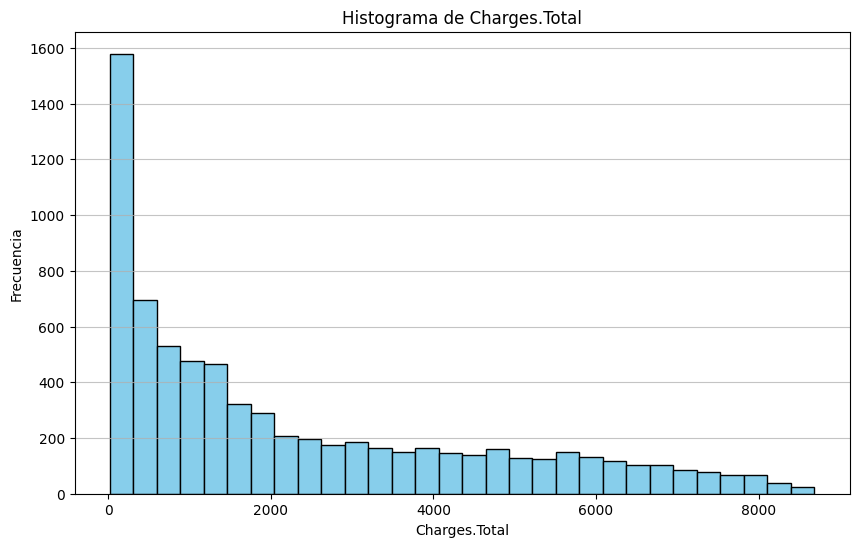

In [118]:
df_limpio['Charges.Total'] = pd.to_numeric(df_limpio['Charges.Total'], errors='coerce')

# Eliminar valores nulos para el histograma
data = df_limpio['Charges.Total'].dropna()

# Crear histograma
plt.figure(figsize=(10,6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Charges.Total')
plt.xlabel('Charges.Total')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Se genero un histograma para determinar como sutiuir los valores por la media o la mediana. Como la media es mas alta que la mediana y moverian la naturaleza de los datos se decidio dejar la mediana

In [119]:
media = df_limpio['Charges.Total'].mean()
mediana = df_limpio['Charges.Total'].median()

print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 2280.6342130650496
Mediana: 1391.0


In [120]:
# Ejemplo: convertir espacios en blanco a NaN
df_limpio['Charges.Total'] = df_limpio['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)

# Convertir a numérico (por si hubiera strings)
df_limpio['Charges.Total'] = pd.to_numeric(df_limpio['Charges.Total'], errors='coerce')

# Calcular la mediana ignorando NaN
mediana = df_limpio['Charges.Total'].median()

# Rellenar NaN con la mediana
df_limpio['Charges.Total'] =df_limpio['Charges.Total'].fillna(mediana)

In [121]:
# Crear una función para detectar espacios vacíos o celdas vacías
def espacios_vacios(df):
    # Aplicar strip y comparar con vacío, manejar nulos con fillna('')
    mask = df.applymap(lambda x: isinstance(x, str) and x.strip() == '')
    return mask

# Aplicar la función al DataFrame
mask_espacios = espacios_vacios(df_limpio)

# Mostrar resumen: cuántos valores vacíos o solo espacios hay por columna
resumen_espacios = mask_espacios.sum().sort_values(ascending=False)

print(resumen_espacios)

Churn               224
customerID            0
OnlineBackup          0
Charges.Monthly       0
PaymentMethod         0
PaperlessBilling      0
Contract              0
StreamingMovies       0
StreamingTV           0
TechSupport           0
DeviceProtection      0
OnlineSecurity        0
InternetService       0
MultipleLines         0
PhoneService          0
tenure                0
Dependents            0
Partner               0
SeniorCitizen         0
gender                0
Charges.Total         0
dtype: int64


C:\Users\iveth\AppData\Local\Temp\ipykernel_96368\660171831.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: isinstance(x, str) and x.strip() == '')


In [122]:
# Clientes con Churn vacío
sin_churn = df_limpio[df_limpio['Churn'].isnull() | (df_limpio['Churn'].str.strip() == '')]

# Clientes con Churn definido
con_churn = df_limpio[df_limpio['Churn'].notnull() & (df_limpio['Churn'].str.strip() != '')]

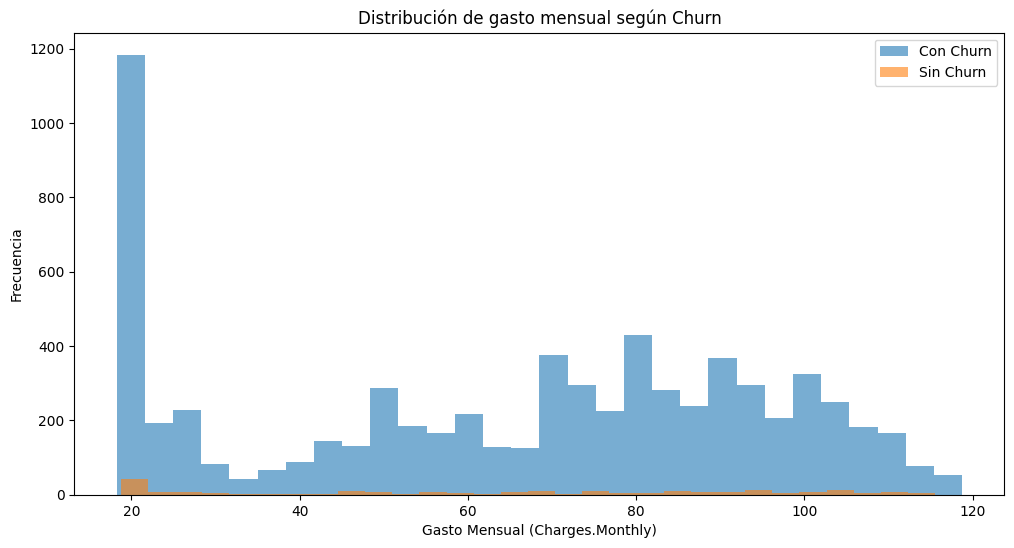

In [123]:
plt.figure(figsize=(12,6))

# Histograma
plt.hist(con_churn['Charges.Monthly'].dropna(), bins=30, alpha=0.6, label='Con Churn')
plt.hist(sin_churn['Charges.Monthly'].dropna(), bins=30, alpha=0.6, label='Sin Churn')

plt.xlabel('Gasto Mensual (Charges.Monthly)')
plt.ylabel('Frecuencia')
plt.title('Distribución de gasto mensual según Churn')
plt.legend()
plt.show()

In [124]:
print("Gasto mensual - clientes sin Churn:")
print(sin_churn['Charges.Monthly'].describe())

print("\nGasto mensual - clientes con Churn:")
print(con_churn['Charges.Monthly'].describe())

Gasto mensual - clientes sin Churn:
count    224.000000
mean      63.412277
std       31.388712
min       18.750000
25%       28.425000
50%       69.100000
75%       90.412500
max      115.550000
Name: Charges.Monthly, dtype: float64

Gasto mensual - clientes con Churn:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Charges.Monthly, dtype: float64


**Eliminacion de filas**

Se eliminan los que no tienen dato por las siguientes razones

Esos 224 clientes con Churn vacío representan solo 3.18% del total (224 / 7267 ≈ 0.0318).

El gasto mensual promedio y su distribución (media, mediana, percentiles) son muy similares entre ambos grupos.

No hay indicios fuertes de que esos clientes sin etiqueta sean muy diferentes en términos de gasto.

In [125]:
df_limpio = df_limpio[df_limpio['Churn'].notnull() & (df_limpio['Churn'].str.strip() != '')]

In [126]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

**Creacion de columna**

Creacion de columna de cuentas diarias

In [127]:
df_limpio['Cuentas_diarias'] = (df_limpio['Charges.Monthly'] / 30).round(2)

df_limpio.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


Cambiar a boleanos las columnas que tienen Yes y No  USO DE df_modificado

In [128]:
def convertir_yes_no_exacto(df):
    df_nuevo = df.copy()

    for col in df_nuevo.select_dtypes(include='object').columns:
        # Verificar si la columna tiene al menos un 'Yes' o 'No' exacto (ignorando mayúsculas y espacios)
        valores = df_nuevo[col].dropna().unique()
        tiene_yes_no = any(str(v).strip().lower() in ['yes', 'no'] for v in valores)

        if tiene_yes_no:
            # Solo convertir celdas que sean exactamente 'yes' o 'no'
            def convertir_valor(x):
                if isinstance(x, str):
                    val = x.strip().lower()
                    if val == 'yes':
                        return 1
                    elif val == 'no':
                        return 0
                return x
            
            df_nuevo[col] = df_nuevo[col].apply(convertir_valor)
    
    return df_nuevo


df_modificado = convertir_yes_no_exacto(df_limpio)
df_modificado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


***Analisis descriptivo***

In [129]:
df_modificado.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.906815,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.274362,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


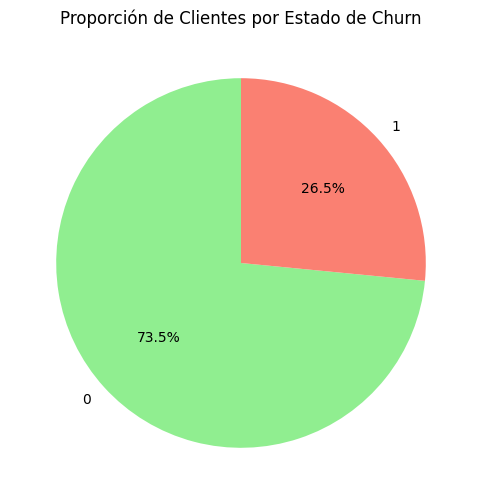

In [130]:
churn_counts = df_modificado['Churn'].value_counts()

plt.figure(figsize=(6,6))
churn_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen','salmon'])
plt.title('Proporción de Clientes por Estado de Churn')
plt.ylabel('')
plt.show()

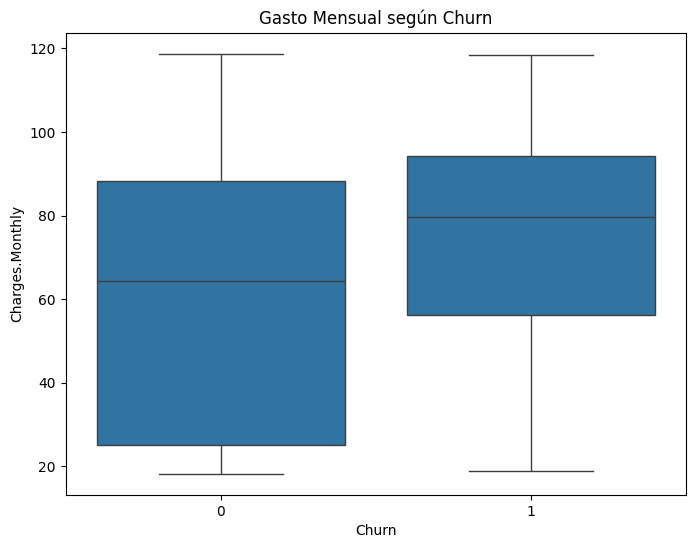

In [131]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_modificado)
plt.title('Gasto Mensual según Churn')
plt.show()

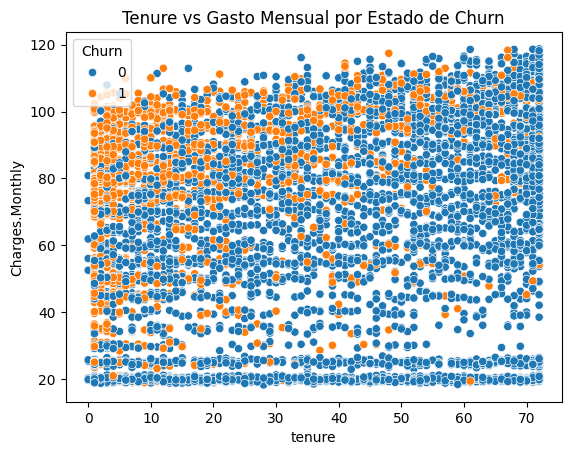

In [132]:
sns.scatterplot(x='tenure', y='Charges.Monthly', hue='Churn', data=df_modificado)
plt.title('Tenure vs Gasto Mensual por Estado de Churn')
plt.show()

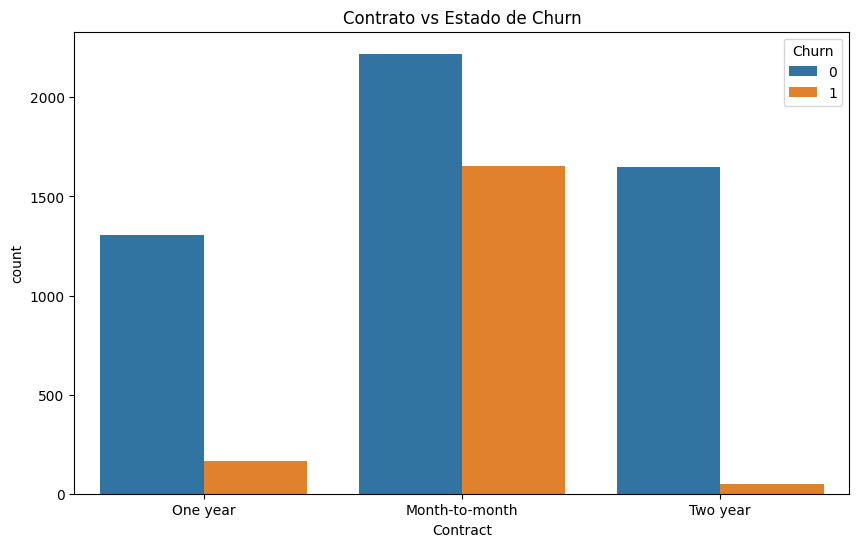

In [133]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contract', hue='Churn', data=df_modificado)
plt.title('Contrato vs Estado de Churn')
plt.show()

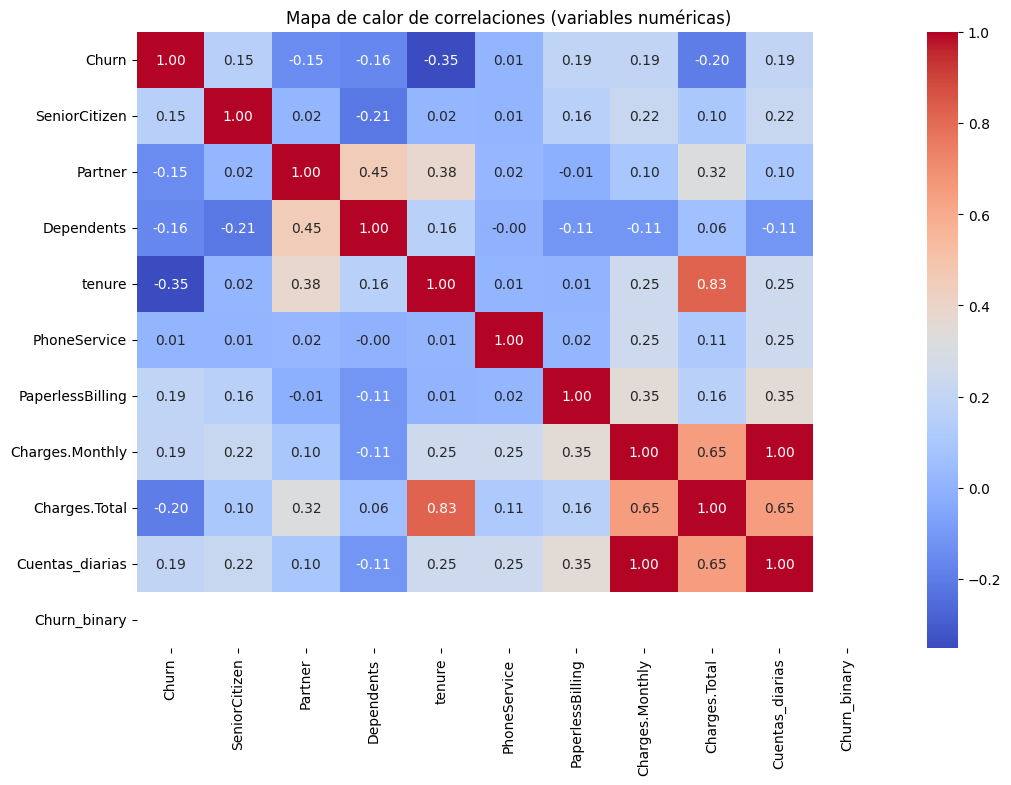

In [136]:
# Seleccionar solo columnas numéricas (int y float)
cols_numericas = df_modificado.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Asegurarte que 'Churn_binary' esté incluida (si no es numérica aún)
if 'Churn_binary' not in cols_numericas:
    cols_numericas.append('Churn_binary')

plt.figure(figsize=(12,8))
sns.heatmap(df_modificado[cols_numericas].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de calor de correlaciones (variables numéricas)')
plt.show()

Recuento de evasión por variables categóricas

In [137]:
tabla = pd.crosstab(df['gender'], df_modificado['Churn'], normalize='index')
print(tabla)

Churn          0         1
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


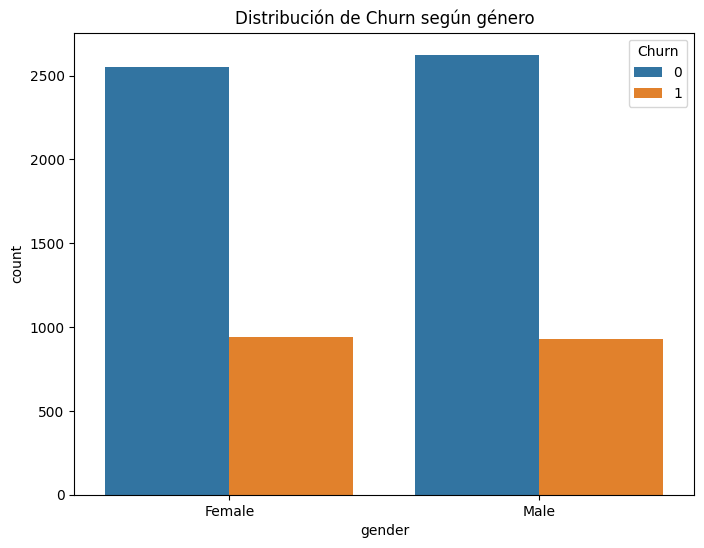

In [138]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='Churn', data=df_modificado)
plt.title('Distribución de Churn según género')
plt.show()

Se usa df_limpio ya que para graficar esta parte se me dificulta con booleanos y el unico cambio que hubo con df_modificado es que se cambiaron los Yes y no a booleanos

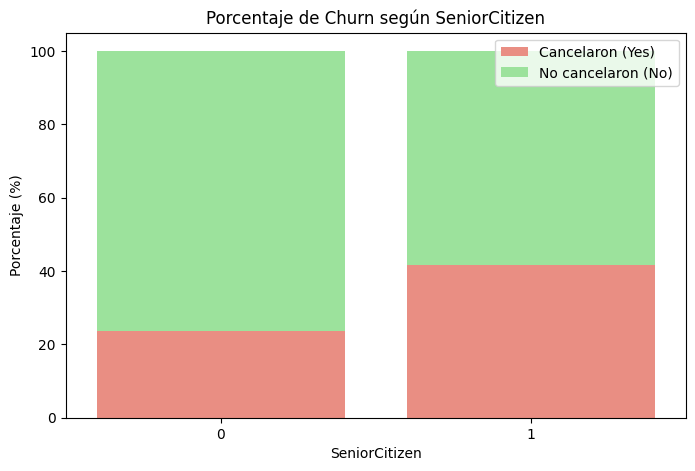

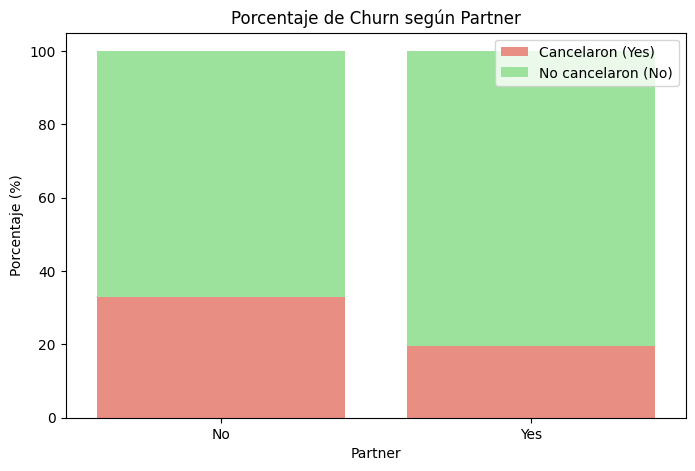

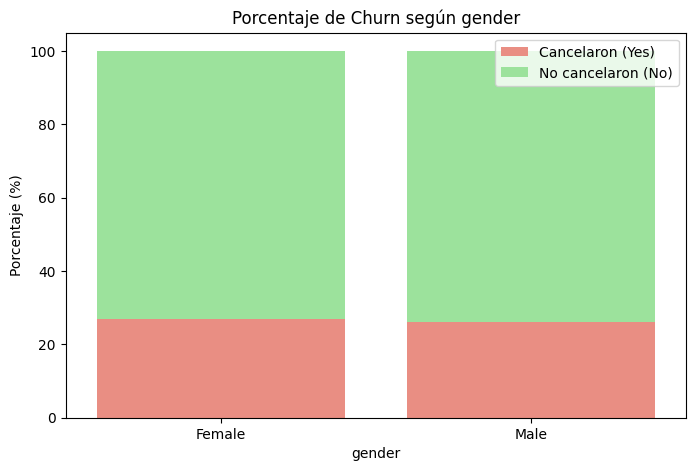

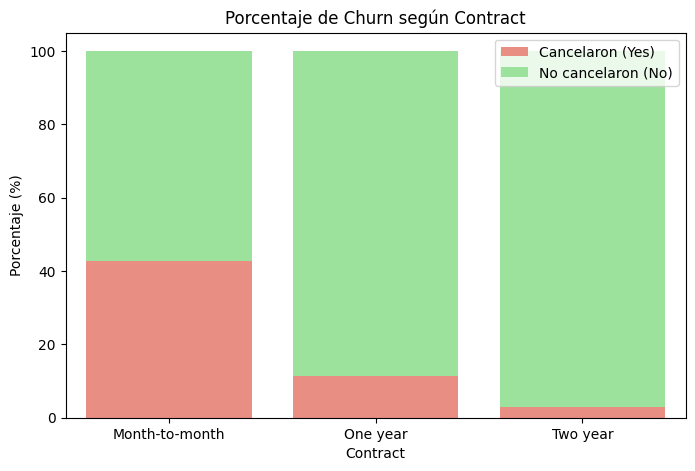

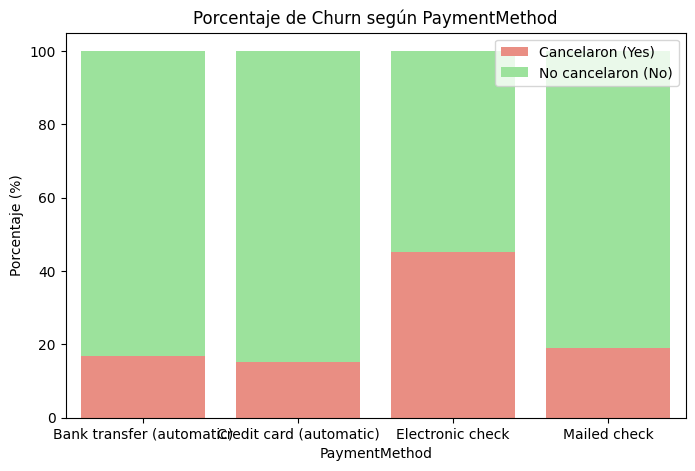

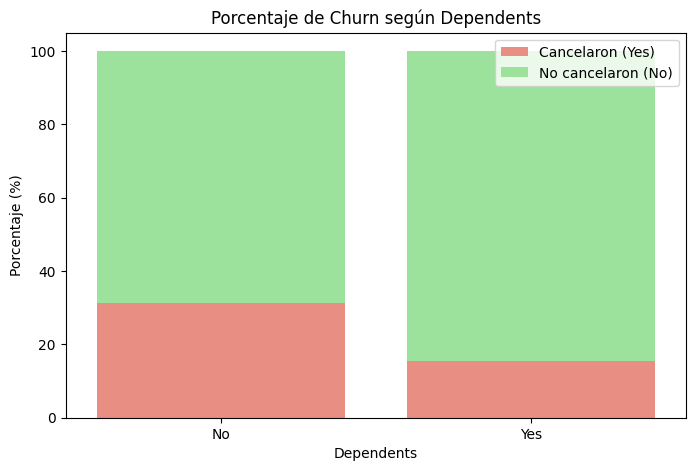

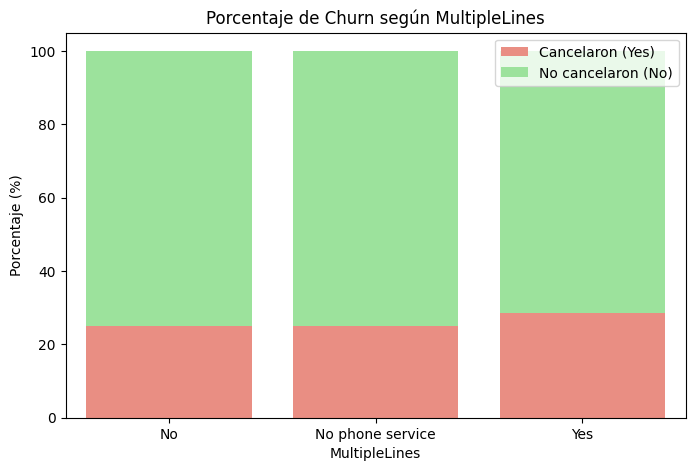

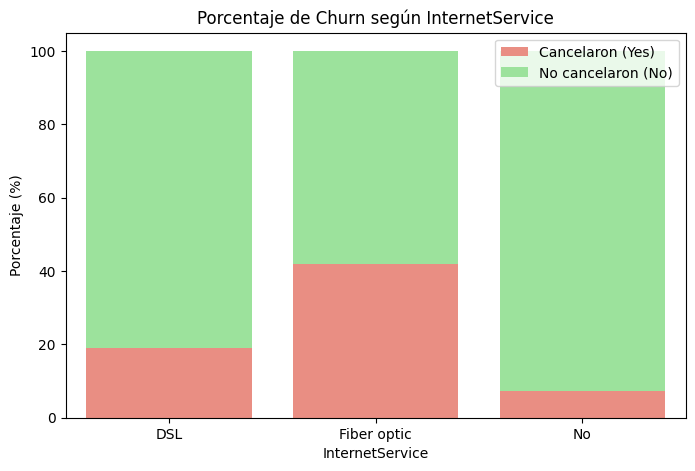

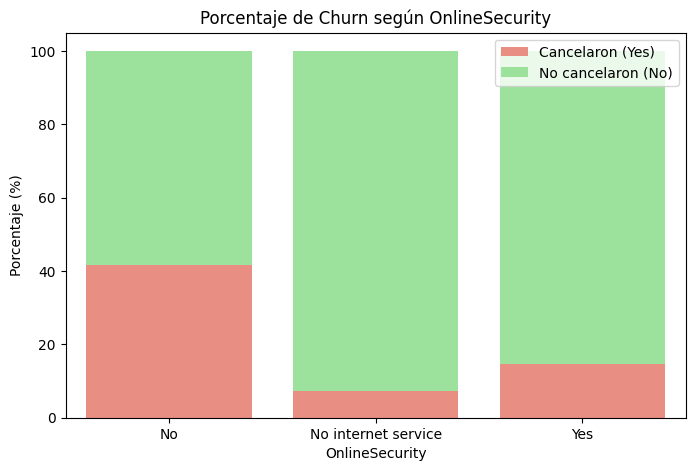

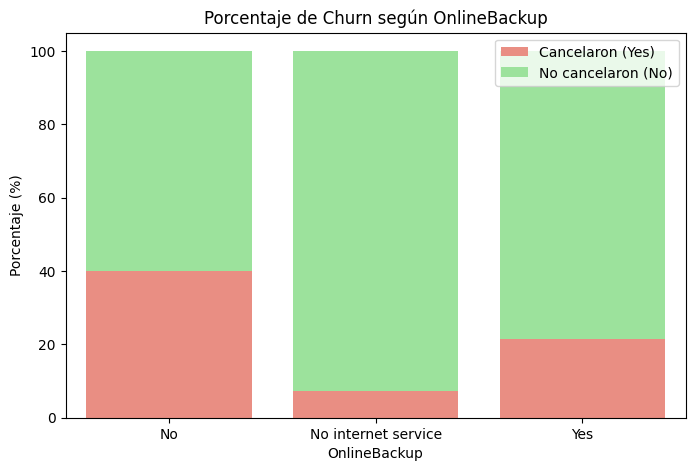

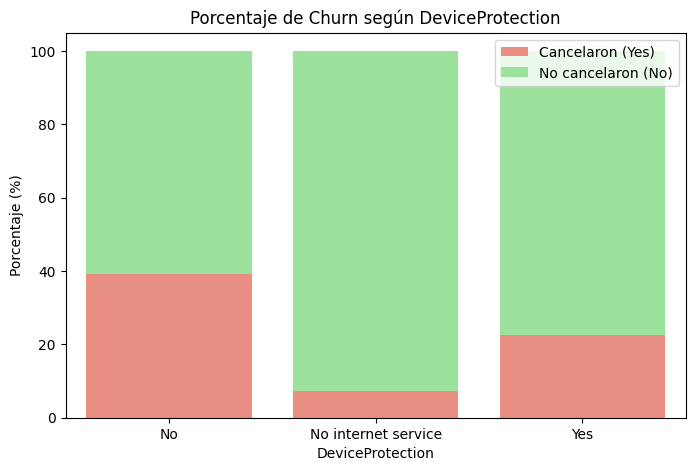

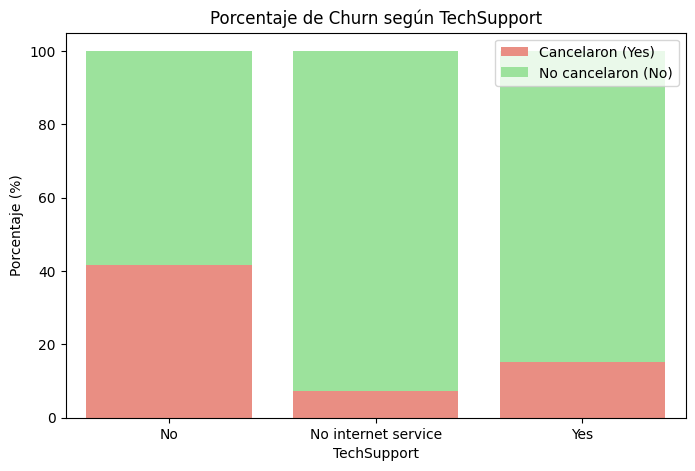

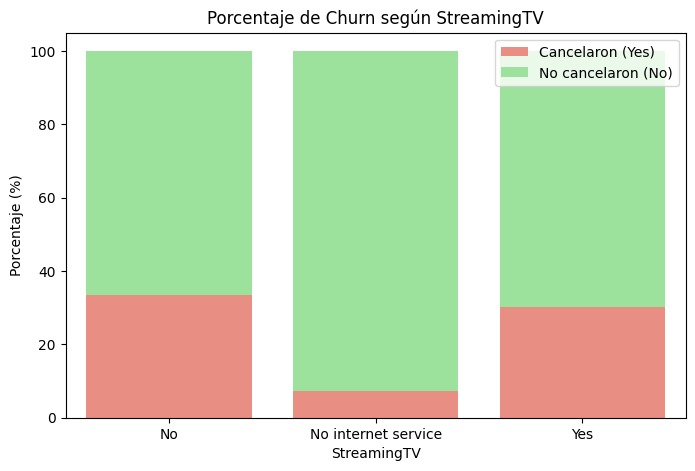

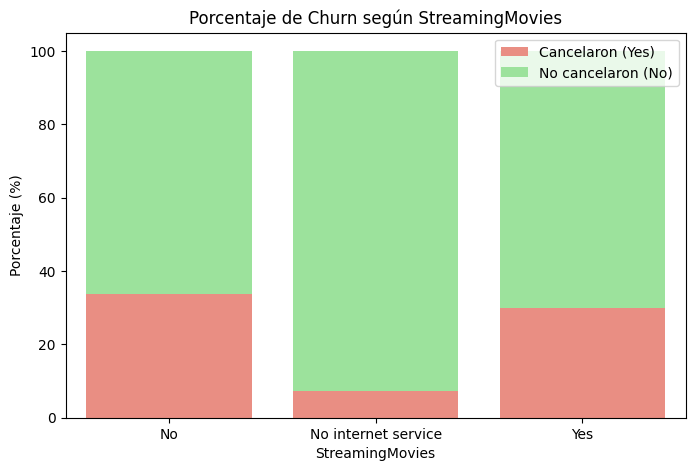

In [147]:
def grafico_porcentaje_churn(df, variable):
    tabla = pd.crosstab(df[variable], df['Churn'], normalize='index') * 100
    tabla = tabla.reset_index()
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=variable, y='Yes', data=tabla, color='salmon', label='Cancelaron (Yes)')
    sns.barplot(x=variable, y='No', data=tabla, color='lightgreen', label='No cancelaron (No)', bottom=tabla['Yes'])
    plt.title(f'Porcentaje de Churn según {variable}')
    plt.ylabel('Porcentaje (%)')
    plt.legend()
    plt.show()

# Ejemplo para usarlo con varias variables categóricas:
variables_categoricas = [
    'SeniorCitizen', 'Partner', 'gender', 'Contract', 'PaymentMethod',
    'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]

for var in variables_categoricas:
    grafico_porcentaje_churn(df_limpio, var)

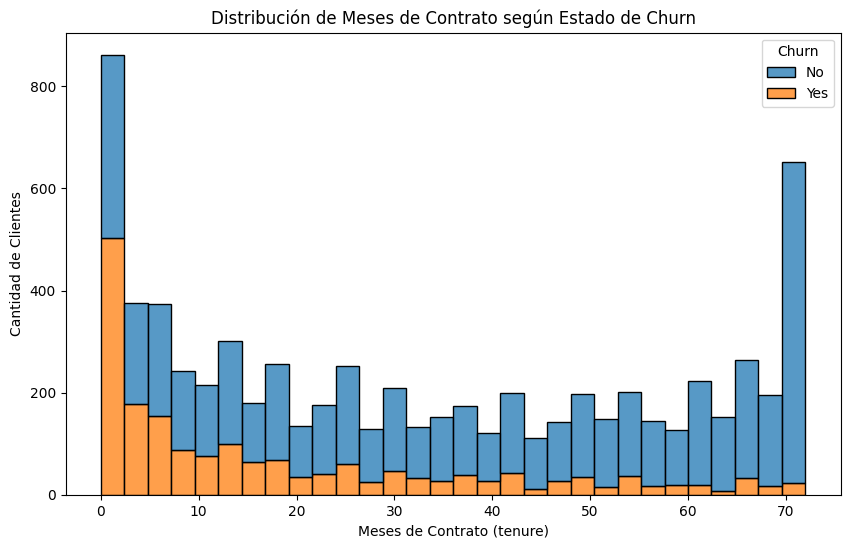

In [148]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_limpio, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribución de Meses de Contrato según Estado de Churn')
plt.xlabel('Meses de Contrato (tenure)')
plt.ylabel('Cantidad de Clientes')
plt.show()

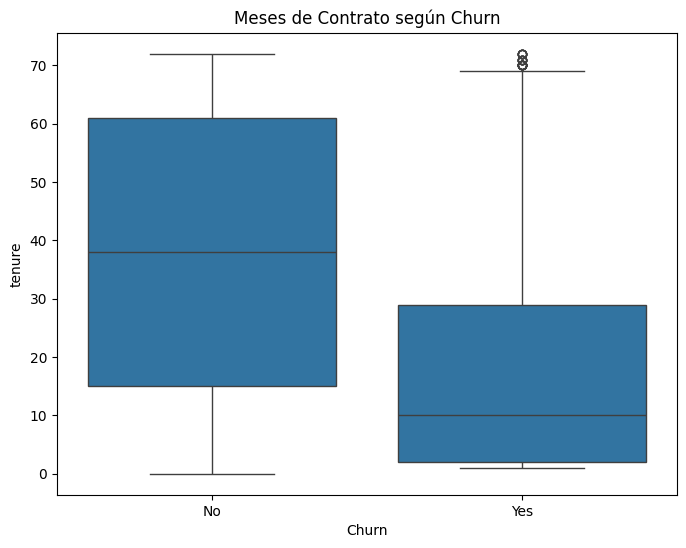

In [149]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='tenure', data=df_limpio)
plt.title('Meses de Contrato según Churn')
plt.show()

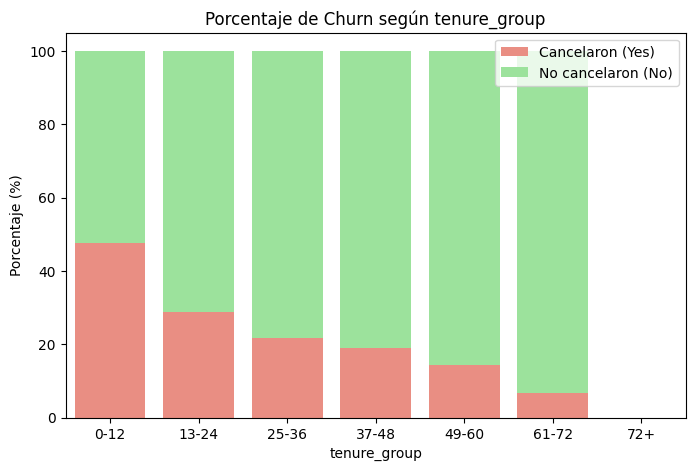

In [150]:
# Crear bins (ejemplo: 0-12 meses, 13-24, 25-36, etc.)
df_limpio['tenure_group'] = pd.cut(df_limpio['tenure'], bins=[0,12,24,36,48,60,72,100], labels=['0-12','13-24','25-36','37-48','49-60','61-72','72+'])

# Gráfico de porcentaje churn por grupo
grafico_porcentaje_churn(df_limpio, 'tenure_group')


Conteo de evasión por variables numéricas


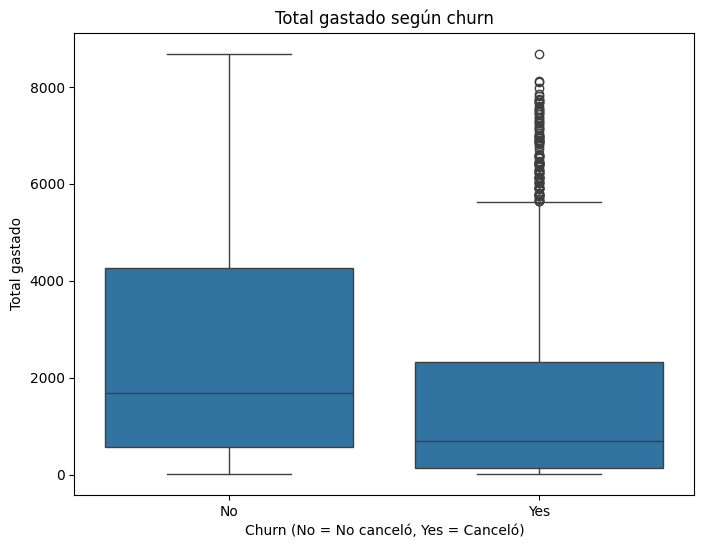

In [153]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_limpio)
plt.title('Total gastado según churn')
plt.xlabel('Churn (No = No canceló, Yes = Canceló)')
plt.ylabel('Total gastado')
plt.show()

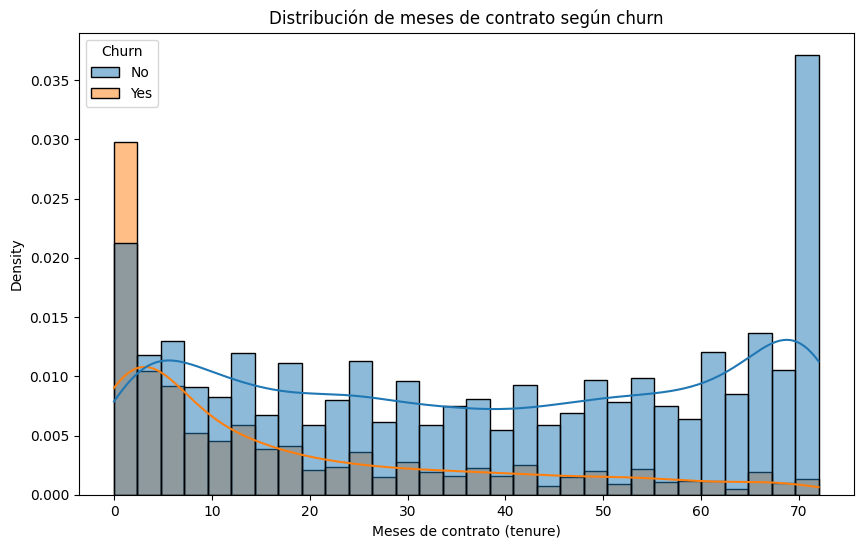

In [154]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_limpio, x='tenure', hue='Churn', bins=30, kde=True, stat='density')
plt.title('Distribución de meses de contrato según churn')
plt.xlabel('Meses de contrato (tenure)')
plt.show()

In [155]:
estadisticas = df_limpio.groupby('Churn')[['Charges.Total', 'tenure']].describe()
print(estadisticas)

      Charges.Total                                                      \
              count         mean          std    min      25%       50%   
Churn                                                                     
No           5174.0  2552.868728  2327.596985  18.80  579.575  1679.525   
Yes          1869.0  1531.796094  1890.822994  18.85  134.500   703.550   

                         tenure                                               \
           75%      max   count       mean        std  min   25%   50%   75%   
Churn                                                                          
No     4262.85  8672.45  5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0   
Yes    2331.30  8684.80  1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0   

             
        max  
Churn        
No     72.0  
Yes    72.0  


1. Introducción
La empresa Telecom X enfrenta un alto índice de cancelación de servicios, también conocido como churn, lo que impacta de forma significativa en sus ingresos y sostenibilidad a largo plazo.
El objetivo de este análisis es comprender los factores que influyen en la decisión de los clientes de cancelar el servicio, para poder desarrollar estrategias que reduzcan esta tasa.

Este estudio se enfoca en:

Identificar patrones de comportamiento de los clientes que abandonan el servicio.

Comparar características entre clientes que permanecen y los que se dan de baja.

Proporcionar información útil para el desarrollo de modelos predictivos.

2. Limpieza y Tratamiento de Datos
Pasos realizados:

Importación de datos: Lectura del dataset en formato JSON/CSV desde la fuente.

Revisión de estructura: Inspección de tipos de datos y primeras filas para entender el contenido.

Tratamiento de valores faltantes:

Eliminación de filas con Charges.Total vacío.

Conversión de espacios en blanco a valores nulos (NaN) para su tratamiento.

Transformaciones adicionales:

Creación de la columna Cuentas_diarias = Charges.Monthly / 30.

Conversión de respuestas "Yes" y "No" a valores booleanos en un DataFrame auxiliar.

Eliminación de duplicados y revisión de outliers.

3. Análisis Exploratorio de Datos (EDA)
3.1 Distribución del Churn
Se evaluó la proporción de clientes que cancelaron vs. los que permanecieron:

Gráfico de pastel / barras para mostrar la distribución de "Churn".

3.2 Variables categóricas
Se graficaron porcentajes de churn por categorías (género, contrato, método de pago, servicios adicionales, etc.).

Hallazgos:

Los contratos mensuales muestran mayor tasa de churn.

Algunos métodos de pago (por ejemplo, pago electrónico) tienen más clientes que cancelan.

Usuarios con menos servicios adicionales tienden a irse más.

3.3 Variables numéricas
Boxplots y histogramas para analizar:

tenure (meses de contrato)

Charges.Total (total gastado)

Charges.Monthly (cargo mensual)

Hallazgos:

Clientes con menor tiempo de permanencia (tenure bajo) presentan mayor tasa de churn.

El gasto mensual alto está relacionado con una tasa de churn moderada.

3.4 Correlaciones
Mapa de calor para variables numéricas:

Charges.Monthly, Charges.Total, tenure y variables derivadas.

El CustomerID no se incluyó por no ser relevante para correlaciones.

4. Conclusiones e Insights
Tiempo de permanencia: Clientes con menos de un año de contrato son los más propensos a cancelar.

Tipo de contrato: Contratos mensuales presentan mayor riesgo de churn.

Servicios adicionales: Los clientes que contratan más servicios (protección de dispositivos, soporte técnico, streaming) tienden a permanecer más.

Método de pago: Ciertos métodos como débito automático están asociados con menor tasa de churn.

5. Recomendaciones Estratégicas
Incentivos para contratos de largo plazo: Descuentos o beneficios por cambiar de contrato mensual a anual.

Mejorar retención en los primeros meses: Campañas de onboarding y soporte personalizado.

Promocionar servicios adicionales que aumenten el engagement del cliente.

Facilitar métodos de pago automáticos para reducir cancelaciones impulsivas.

Monitoreo proactivo: Crear alertas para clientes con bajo tenure y sin servicios adicionales.

